<a href="https://colab.research.google.com/github/waspar00/Gusev-2025/blob/main/Ex4OCRUsingTesseract.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!sudo apt install tesseract-ocr

In [153]:
import cv2
import numpy as np
import math
import matplotlib.pyplot as plt
%matplotlib inline
import urllib.request
import pytesseract
pytesseract.pytesseract.tesseract_cmd = ( r'/usr/bin/tesseract' )
from google.colab.patches import cv2_imshow
import matplotlib as mpl

SCALAR_BLACK = (0.0,0.0,0.0)

In [ ]:
def plotting(image, cmap = None):
    if cmap == 'gray':
        height, width = image.shape
    else:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        height, width, depth = image.shape

    dpi = mpl.rcParams['figure.dpi']
    # What size does the figure need to be in inches to fit the image?
    figsize = width / float(dpi), height / float(dpi)

    # Create a figure of the right size with one axes that takes up the full figure
    fig = plt.figure(figsize=figsize)

    # Display the image.
    plt.imshow(image, cmap)

My cool method, consisting of grayscaling, bilateral filtering, thresholding and dilation-erosion.

In [191]:
def myCoolMethod(image, l='eng'):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    bilateral = cv2.bilateralFilter(gray,9,75,100)
    adaptive_threshold_gaussian = cv2.adaptiveThreshold(bilateral,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv2.THRESH_BINARY,11,2)

    strucEle1x1 = cv2.getStructuringElement(cv2.MORPH_RECT,(1,1))

    for i in range(2):
        imgThresh = cv2.dilate(adaptive_threshold_gaussian,strucEle1x1,iterations = 3)
        imgThresh = cv2.erode(imgThresh,strucEle1x1,iterations = 3)

    plotting(imgThresh, cmap = 'gray')

    text = pytesseract.image_to_string(imgThresh, lang = l)
    print(text)

---------Before prepro---------
 

 

 

 

“ay A cnmnany is conducting 2 market 7 >

aa

 
 

---------After prepro---------
 

TT Ret let ttn arnte

3) What Is the primary goal of 1 pots
segmentation in B28 marketing?

O’Fo Increase overa’l market share

O'To tailor marketing eHorts to specific
customer Groups

O To reduce the number of potential
customers to a manageadte level

O To target only the largest and most
profitable businesses

ee anenerne
ay ew eamnany fs conducungamarket = pods

 

 



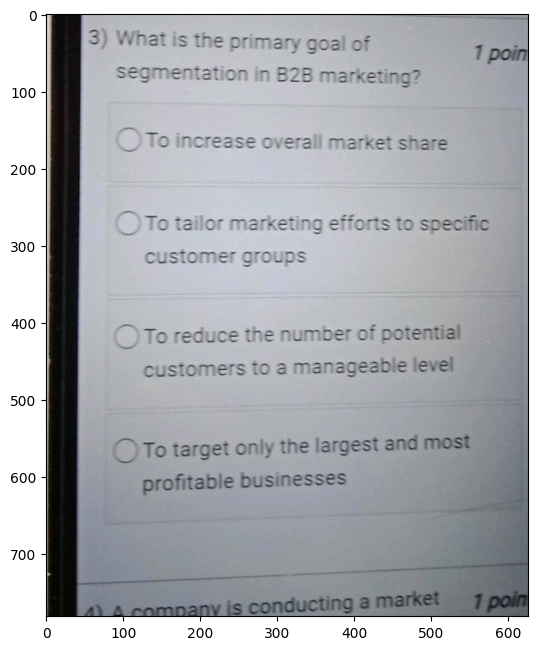

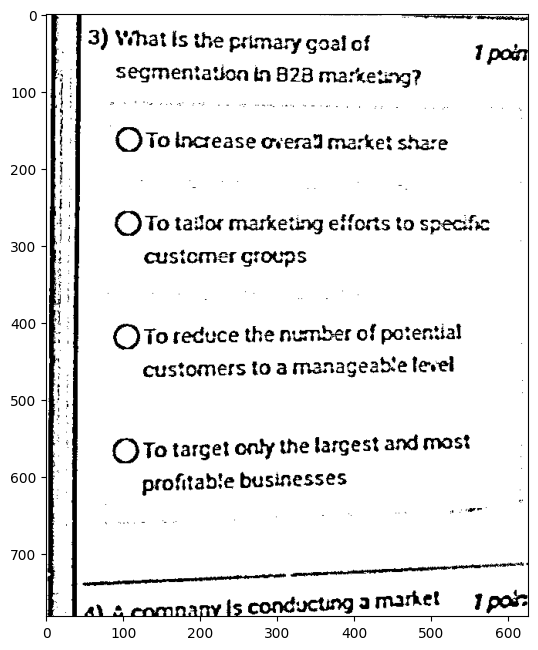

In [184]:
req = urllib.request.urlopen('https://media.studyx.ai/us/6bad6d39/771b436847eb4e8ebe011780f4c7bd21.jpg')
arr = np.asarray(bytearray(req.read()), dtype=np.uint8)
image = cv2.imdecode(arr, -1) # 'Load it as it is'

plotting(image)
text = pytesseract.image_to_string(image)
print ('---------Before prepro---------')
print(text)
print ('---------After prepro---------')
myCoolMethod(image)


Adding russian

In [193]:
!apt-get install tesseract-ocr-rus

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  tesseract-ocr-rus
0 upgraded, 1 newly installed, 0 to remove and 49 not upgraded.
Need to get 1,271 kB of archives.
After this operation, 3,877 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-rus all 1:4.00~git30-7274cfa-1.1 [1,271 kB]
Fetched 1,271 kB in 1s (1,697 kB/s)
Selecting previously unselected package tesseract-ocr-rus.
(Reading database ... 123679 files and directories currently installed.)
Preparing to unpack .../tesseract-ocr-rus_1%3a4.00~git30-7274cfa-1.1_all.deb ...
Unpacking tesseract-ocr-rus (1:4.00~git30-7274cfa-1.1) ...
Setting up tesseract-ocr-rus (1:4.00~git30-7274cfa-1.1) ...


---------Before prepro---------
 

Выключатель задних
противотуманных фонарей

1. Для включения задних противоту-
манных фонарей воспользуйтесь вы-
ключателем, показанным на рисунке.
Примечание: задние противотуман-
ные фонари могут быть включены,
если переключатель наружного 0с-
вещения находится в положении #0
или при работающих передних проти-
вотуманных фарах: ь а
2. Для выключения противотуманны
‘фонарей просто нажмите на вы

ВелЬ ПОВтоОно. ^^

 
  

 

 

> а

---------After prepro---------
 

 

Выключатель задних.
противотуманных фонарей.

1: Для; включения. задних. противоту-
манных. ‚фонарей. воспользуйтесь. вы-
ключателем, ‚показанным на-рисунке. _
Примечание: задние’ ‘противотуман-
ные фонари. ‘могут: ‘быть. включены,
если переключатель: ‘наружного’ ос-
вещения ‘находится. в`‘положении =0.
или при работающих: передних проти-
вотуманных. фарах: - Е

2. Для выключения. ‘противотуманных:
‘фонарей просто + нажмите на. выключа-
тель повторно. ‘о И



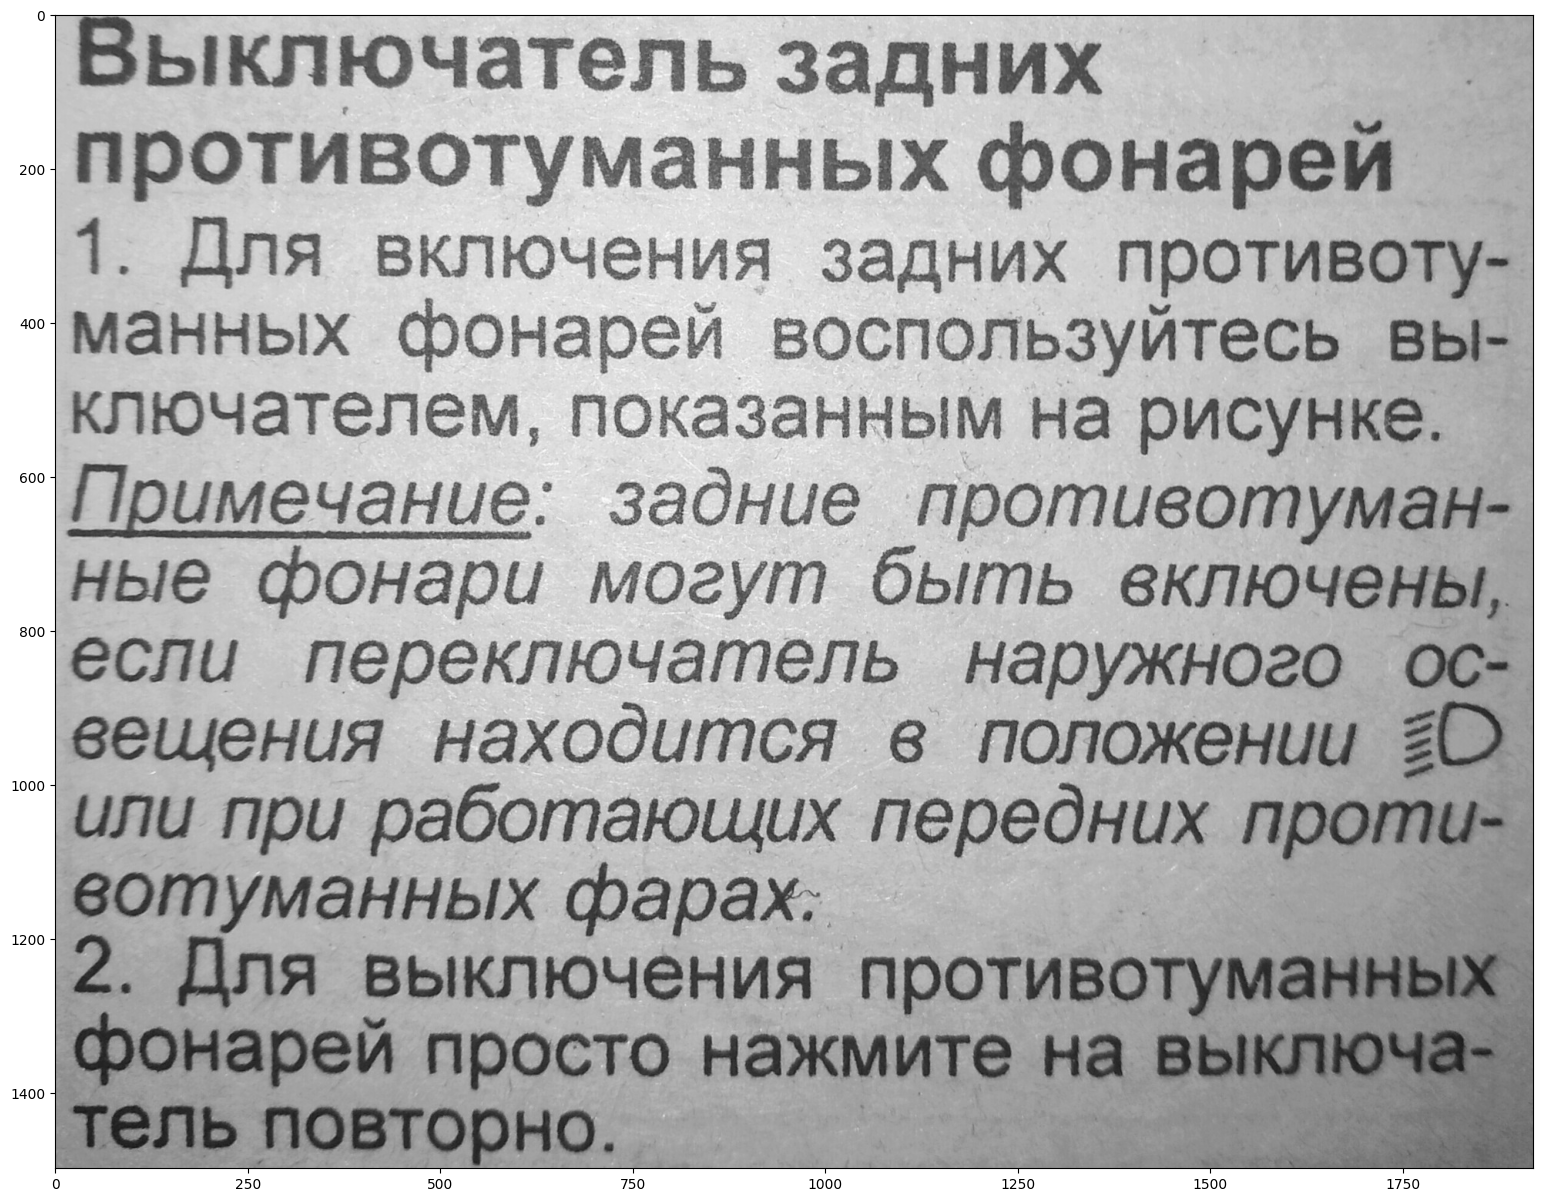

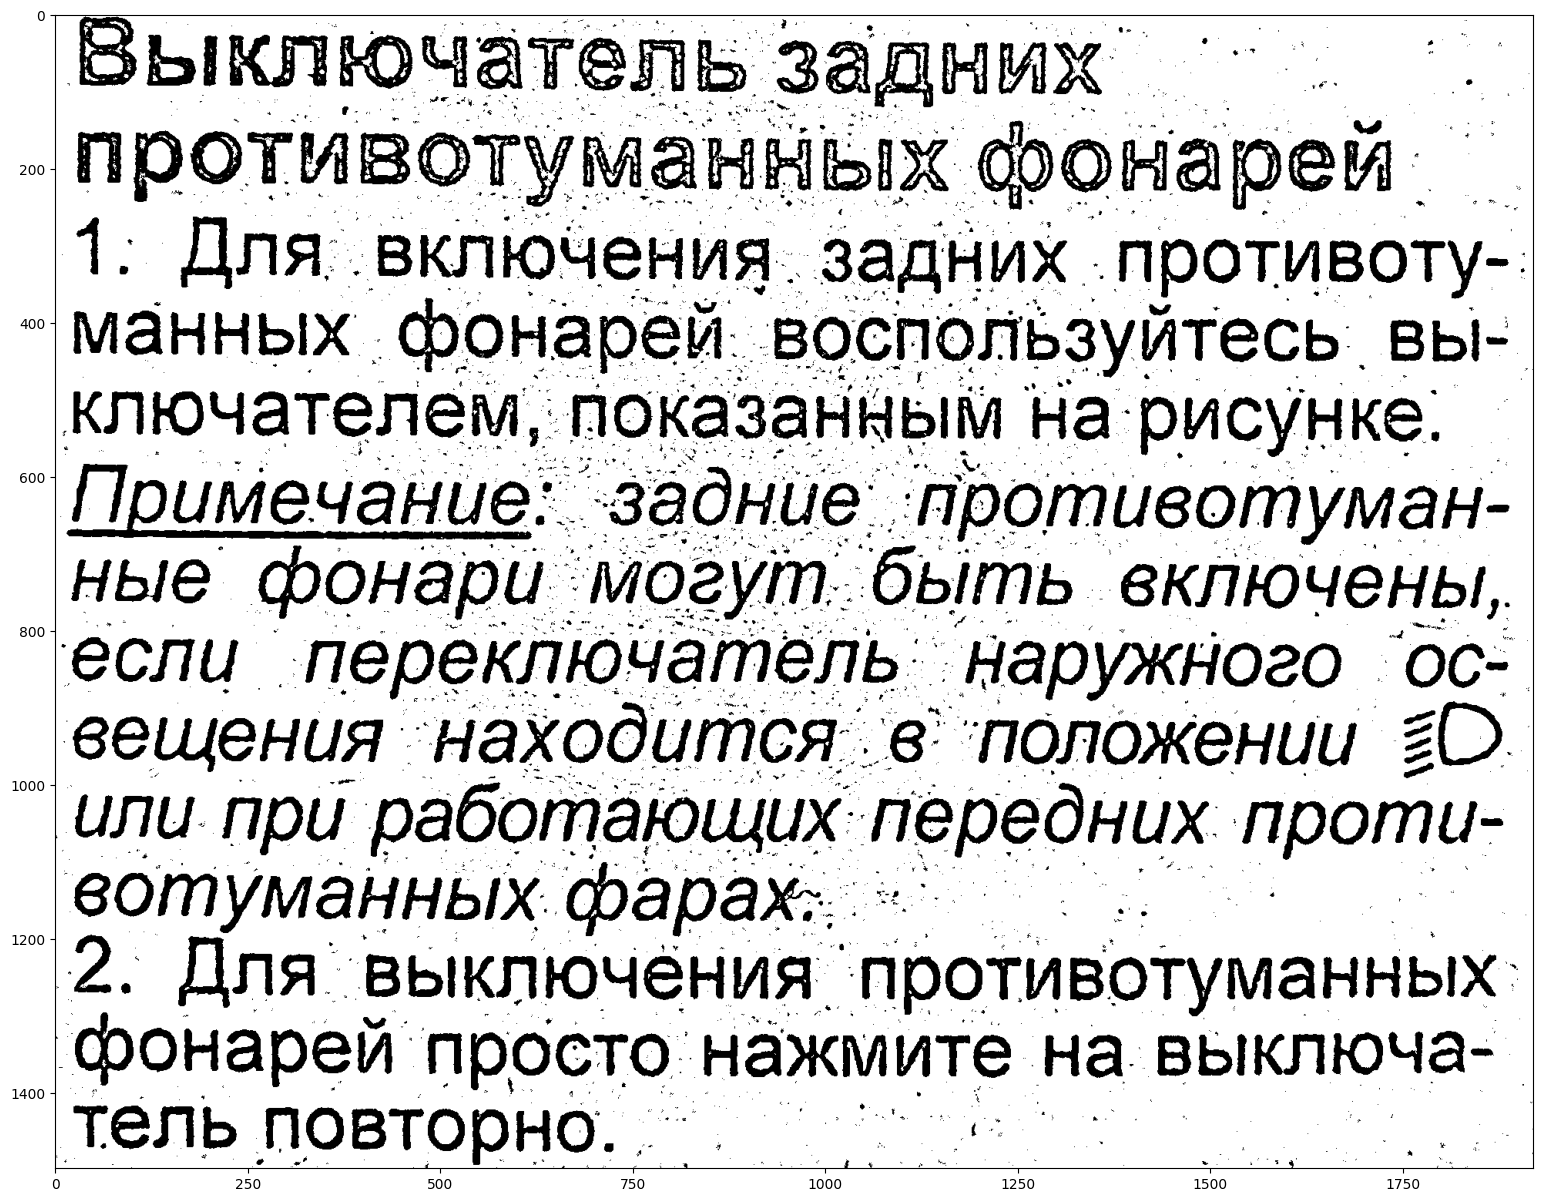

In [194]:

req = urllib.request.urlopen('https://a.d-cd.net/ggAAAgP9CeA-1920.jpg')
arr = np.asarray(bytearray(req.read()), dtype=np.uint8)
image = cv2.imdecode(arr, -1) # 'Load it as it is'

plotting(image)
text = pytesseract.image_to_string(image, lang = "rus")
print ('---------Before prepro---------')
print(text)
print ('---------After prepro---------')
myCoolMethod(image, l ='rus')
